In [40]:
# Load library
import datetime
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as tf_text
from matplotlib import pyplot as plt


# Load constants
DATA_PATH = "data/hand-sign-images"
TENSORBOARD_PATH = "tensorboard"

In [41]:
tf.__version__

'2.10.0'

# Checking Data

In [42]:
!tree /a

Folder PATH listing for volume Program and Files
Volume serial number is 081B-4D30
D:.
+---.ipynb_checkpoints
\---data
    +---.ipynb_checkpoints
    \---hand-sign-images
        +---Test
        |   +---A
        |   +---B
        |   +---C
        |   +---D
        |   +---E
        |   +---F
        |   +---G
        |   +---H
        |   +---I
        |   +---K
        |   +---L
        |   +---M
        |   +---N
        |   +---O
        |   +---P
        |   +---Q
        |   +---R
        |   +---S
        |   +---T
        |   +---U
        |   +---V
        |   +---W
        |   +---X
        |   \---Y
        \---Train
            +---A
            +---B
            +---C
            +---D
            +---E
            +---F
            +---G
            +---H
            +---I
            +---K
            +---L
            +---M
            +---N
            +---O
            +---P
            +---Q
            +---R
            +---S
            +---T
            +---U
  

In [43]:
dataset_train_augmented = tf.keras.utils.image_dataset_from_directory(
    directory=f"{DATA_PATH}/Train",
    color_mode='grayscale',
    label_mode='categorical',
    batch_size=32,
    image_size=(28, 28),
    seed=2023,
)
dataset_test = tf.keras.utils.image_dataset_from_directory(
    directory=f"{DATA_PATH}/Test",
    color_mode='grayscale',
    label_mode='categorical',
    batch_size=32,
    image_size=(28, 28),
    seed=2023,
)

# data_augmentation_layers = tf.keras.Sequential(
#     [
#         tf.keras.layers.RandomFlip("horizontal"),
#         tf.keras.layers.RandomRotation(0.1),
#         tf.keras.layers.RandomZoom(0.1),
#     ]
# )

# dataset_train_augmented = dataset_train_augmented\
#                             .map(lambda x, y: (data_augmentation_layers(x), y))

Found 27455 files belonging to 24 classes.
Found 7172 files belonging to 24 classes.


# Modelling!

In [46]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1), dtype=tf.float32),
    tf.keras.layers.Conv2D(16, (3,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(24)
])

loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True,
)

optim = tf.keras.optimizers.Adam(
    learning_rate=1e-4
)

model.compile(
    optimizer=optim,
    loss=loss,
    metrics=['accuracy']
)

In [47]:
model.fit(
    x=dataset_train_augmented,
    validation_data=dataset_test,
    epochs=5
)

Epoch 1/5
858/858 [==============================] - 16s 18ms/step - loss: 2.9837 - accuracy: 0.4994 - val_loss: 1.6117 - val_accuracy: 0.5788
Epoch 2/5
858/858 [==============================] - 16s 18ms/step - loss: 0.5409 - accuracy: 0.8270 - val_loss: 1.3788 - val_accuracy: 0.6877
Epoch 3/5
858/858 [==============================] - 16s 18ms/step - loss: 0.2158 - accuracy: 0.9311 - val_loss: 1.0004 - val_accuracy: 0.7341
Epoch 4/5
858/858 [==============================] - 16s 18ms/step - loss: 0.0878 - accuracy: 0.9760 - val_loss: 1.2974 - val_accuracy: 0.6992
Epoch 5/5
858/858 [==============================] - 17s 20ms/step - loss: 0.0528 - accuracy: 0.9846 - val_loss: 0.8497 - val_accuracy: 0.8065


In [48]:
model.fit(
    x=dataset_train_augmented,
    validation_data=dataset_test,
    epochs=5
)

Epoch 1/5
858/858 [==============================] - 16s 18ms/step - loss: 0.1035 - accuracy: 0.9702 - val_loss: 0.7925 - val_accuracy: 0.8144
Epoch 2/5
858/858 [==============================] - 16s 19ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.7955 - val_accuracy: 0.8027
Epoch 3/5
858/858 [==============================] - 16s 19ms/step - loss: 0.0631 - accuracy: 0.9827 - val_loss: 0.7370 - val_accuracy: 0.8264
Epoch 4/5
858/858 [==============================] - 16s 19ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7713 - val_accuracy: 0.8253
Epoch 5/5
858/858 [==============================] - 16s 18ms/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.8815 - val_accuracy: 0.8126


In [49]:
model.fit(
    x=dataset_train_augmented,
    validation_data=dataset_test,
    epochs=5
)

Epoch 1/5
858/858 [==============================] - 16s 19ms/step - loss: 9.3114e-04 - accuracy: 1.0000 - val_loss: 0.8765 - val_accuracy: 0.8197
Epoch 2/5
858/858 [==============================] - 16s 18ms/step - loss: 5.1782e-04 - accuracy: 1.0000 - val_loss: 0.8964 - val_accuracy: 0.8200
Epoch 3/5
858/858 [==============================] - 16s 19ms/step - loss: 3.3011e-04 - accuracy: 1.0000 - val_loss: 0.9068 - val_accuracy: 0.8264
Epoch 4/5
858/858 [==============================] - 15s 18ms/step - loss: 0.0424 - accuracy: 0.9889 - val_loss: 1.0465 - val_accuracy: 0.7659
Epoch 5/5
858/858 [==============================] - 17s 20ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.9841 - val_accuracy: 0.8134


(28, 28, 1)


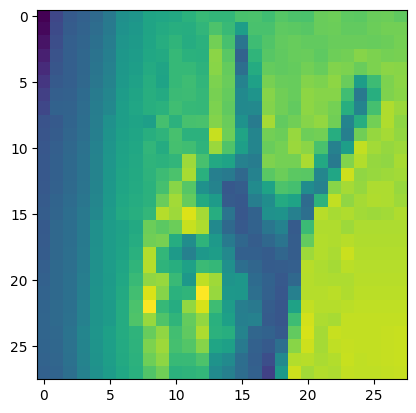

In [69]:
dummy_data = None
for image, label in dataset_test.take(1):
    print(image[20].shape)
    plt.imshow(image[20])    
    dummy_data = image[20]

In [58]:
model.save('handsign_model_v1.h5')

In [59]:
loaded_model = tf.keras.models.load_model('handsign_model_v1.h5')

In [72]:
dummy_data.shape

TensorShape([28, 28, 1])

In [76]:
new_dummy = tf.expand_dims(dummy_data, 0)
new_dummy.shape

TensorShape([1, 28, 28, 1])

In [81]:
tf.argmax(loaded_model(new_dummy)[0]).numpy()

20

In [82]:
def predict(gambar):
    loaded_model = tf.keras.models.load_model('handsign_model_v1.h5')
    gambar = tf.expand_dims(gambar, 0)
    return tf.argmax(loaded_model(gambar)[0]).numpy()

predict(dummy_data)

20

In [85]:
model.save('handsign_model_v1')

INFO:tensorflow:Assets written to: handsign_model_v1\assets


INFO:tensorflow:Assets written to: handsign_model_v1\assets


In [86]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("handsign_model_v1") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [96]:
dummy_data = tf.random.uniform((1, 28,28,1))

In [98]:
loaded_model(dummy_data)

<tf.Tensor: shape=(1, 24), dtype=float32, numpy=
array([[-0.20794019,  0.32682323, -0.03449662, -0.15533367, -0.14991315,
        -0.27794686, -0.00388204, -0.23991324, -0.13797812, -0.40547386,
        -0.05776571, -0.19742754, -0.00073598, -0.1753308 ,  0.22674927,
         0.30690163,  0.03358587,  0.14431922, -0.13683634,  0.2622833 ,
         0.09091446, -0.02990573,  0.00069838,  0.06391816]],
      dtype=float32)>

In [100]:
# Load the TFLite model in TFLite Interpreter
interpreter = tf.lite.Interpreter("model.tflite")
# There is only 1 signature defined in the model,
# so it will return it by default.
# If there are multiple signatures then we can pass the name.
my_signature = interpreter.get_signature_runner()

# my_signature is callable with input as arguments.
output = my_signature(input_1=dummy_data)
# 'output' is dictionary with all outputs from the inference.
# In this case we have single output 'result'.
print(output['dense_3'])

[[-0.20794013  0.3268233  -0.03449665 -0.15533364 -0.14991315 -0.27794662
  -0.00388189 -0.23991324 -0.1379782  -0.40547395 -0.05776555 -0.19742745
  -0.00073609 -0.17533079  0.22674952  0.30690154  0.03358589  0.1443193
  -0.13683632  0.26228327  0.09091452 -0.02990577  0.0006986   0.06391824]]


In [91]:
interpreter._signature_defs

{'serving_default': {'inputs': ['input_1'], 'outputs': ['dense_3']}}